# TASK 02 - SIMPLE LINEAR REGRESSION
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [52]:
# Importing required libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
# Loading Dataset from provided remote link
path = "http://bit.ly/w-data"
dataset = pd.read_csv(path)
print("Data imported successfully!")

dataset.head()

Data imported successfully!


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
#Representing the Stats
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
#Checking for the datatype of each column in this dataframe
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


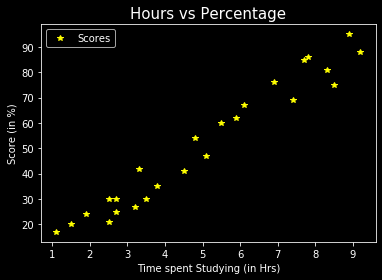

In [33]:
#Visualising the Data
dataset.plot(x='Hours', y='Scores', style='*', color='yellow')
plt.title('Hours vs Percentage', fontsize=15)
plt.xlabel('Time spent Studying (in Hrs)')
plt.ylabel('Score (in %)')
plt.show()
from matplotlib import style
style.use('dark_background')

Thus, it is clearly established that a linear relation between Time spent Studying and Percentage of score exists.

In [21]:
#Preparing the Data
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

In [22]:
#Spliting this data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [23]:
#Training the model
from sklearn.linear_model import LinearRegression  
lrm_train = LinearRegression()  
lrm_train.fit(X_train, y_train) 

print("Training Completed Successfully!")

Training Completed Successfully!


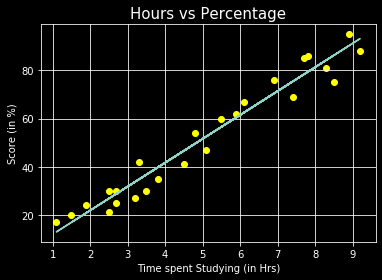

In [37]:
# Plotting the Regression Line
rline = lrm_train.coef_*X+ lrm_train.intercept_

# Plotting for the test data
from matplotlib import style
style.use('dark_background')
plt.scatter(X, y, color='yellow')
plt.title('Hours vs Percentage', fontsize=15)
plt.xlabel('Time spent Studying (in Hrs)')
plt.ylabel('Score (in %)')
plt.plot(X, rline);
plt.grid()
plt.show()

In [38]:
#Making Predictions
p = lrm_train.score(X_train, y_train)
print("Traning score: {}".format(p))
q = lrm_train.score(X_test, y_test)
print("Test score: {}".format(q))

Traning score: 0.9515510725211553
Test score: 0.9454906892105356


In [39]:
#Analysis Per Unit Time
print("Unit of change in hours studied: ",lrm_train.intercept_)
print("Change in the score (in%): ",lrm_train.coef_)

Unit of change in hours studied:  2.018160041434683
Change in the score (in%):  [9.91065648]


In [40]:
##That is, for an approximate increase of One hour in studies, a student can to achieve an increase of 9.91% in the score achieved by him previously.

In [41]:
print(X_test)
y_pred = lrm_train.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [42]:
#Comparing Actual and Predicted Scores
lrm = pd.DataFrame(np.c_[X_test, y_test , y_pred], columns = ["Hours studied", "Actual Marks", "Predctied marks"])
lrm

,Hours studied,Actual Marks,Predctied marks
0,1.5,20.0,16.884145
1,3.2,27.0,33.732261
2,7.4,69.0,75.357018
3,2.5,30.0,26.794801
4,5.9,62.0,60.491033


[]

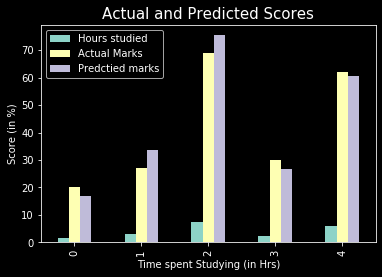

In [43]:
#Visualizing Actual and Predicted Scores
style.use('dark_background')
lrm.plot(kind='bar')
plt.title('Actual and Predicted Scores', fontsize=15)
plt.xlabel('Time spent Studying (in Hrs)')
plt.ylabel('Score (in %)')
plt.plot()

In [47]:
#Testing if a student syudied for 9.25 hours, his predicted score would be:
Hrs = 9.25
Prd = lrm_train.predict([[Hrs]])
print("No of Hours : %f" %Hrs)
print("Predicted Score : %f" %Prd)

No of Hours : 9.250000
Predicted Score : 93.691732


In [50]:
#Evaluating the model
from sklearn import metrics
print('Mean Absolute Error (MAE)     :', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE)      :', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error (MAE)     : 4.183859899002975
Mean Squared Error (MSE)      : 21.5987693072174
Root Mean Squared Error (RMSE): 4.6474476121003665
